# **AMD**

Data Awal:
            Open  High   Low  Close  Volume  OpenInt
Date                                                
1983-03-21  8.97  9.03  8.81   9.00  528000        0
1983-03-22  8.72  8.97  8.50   8.50  332400        0
1983-03-23  8.50  8.81  8.47   8.72  442400        0
1983-03-24  8.72  8.78  8.66   8.78  412000        0
1983-03-25  8.91  9.06  8.75   8.88  216400        0
Bentuk Data: (8737, 6)
Kolom Data: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1200x600 with 0 Axes>

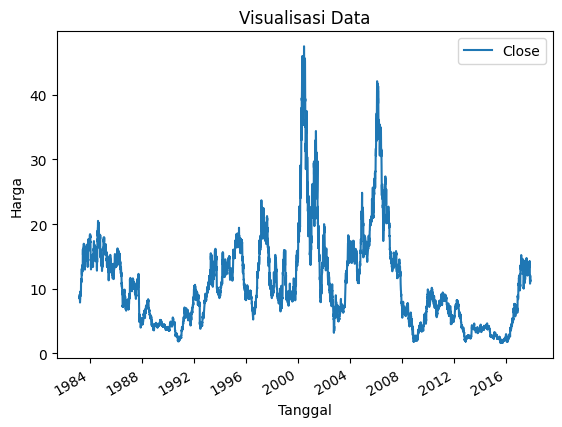

<Figure size 1200x600 with 0 Axes>

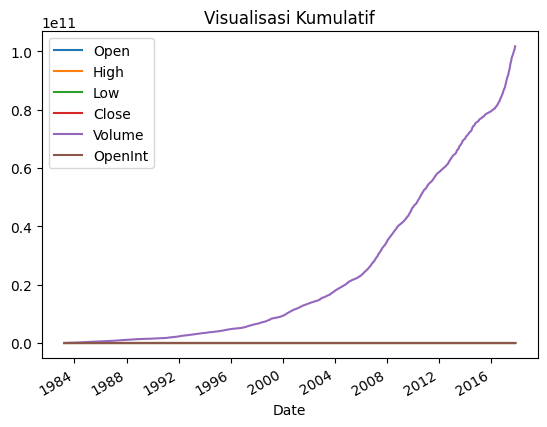

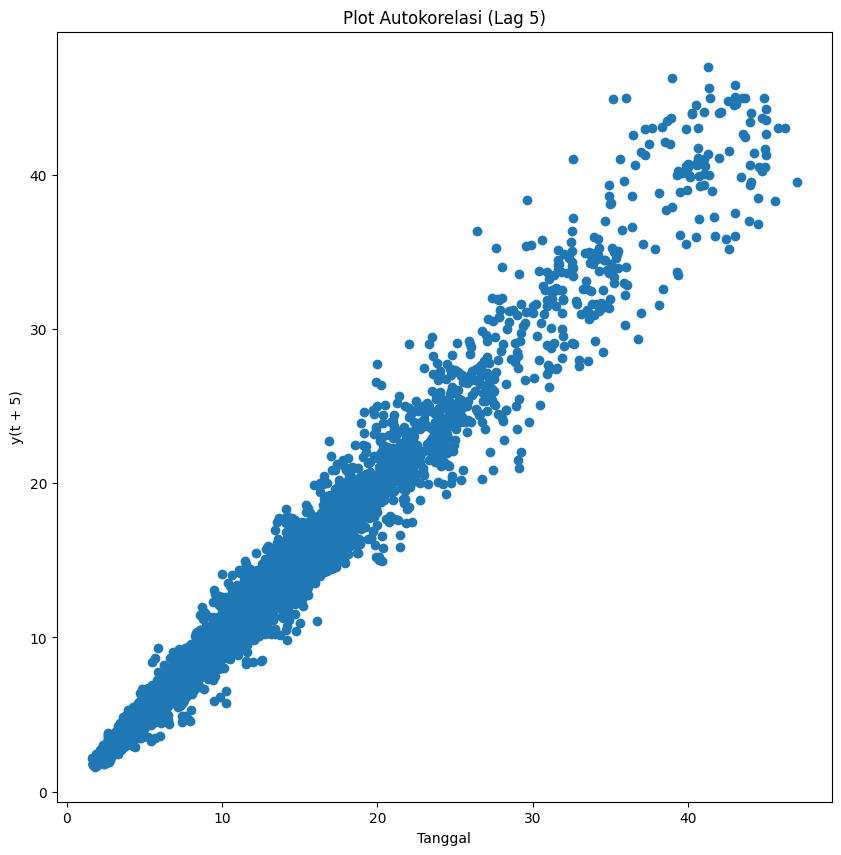

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


194/194 ━━━━━━━━━━━━━━━━━━━━ 132s 665ms/step - loss: 0.0106 - val_loss: 1.1416e-04
216/216 ━━━━━━━━━━━━━━━━━━━━ 34s 155ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step


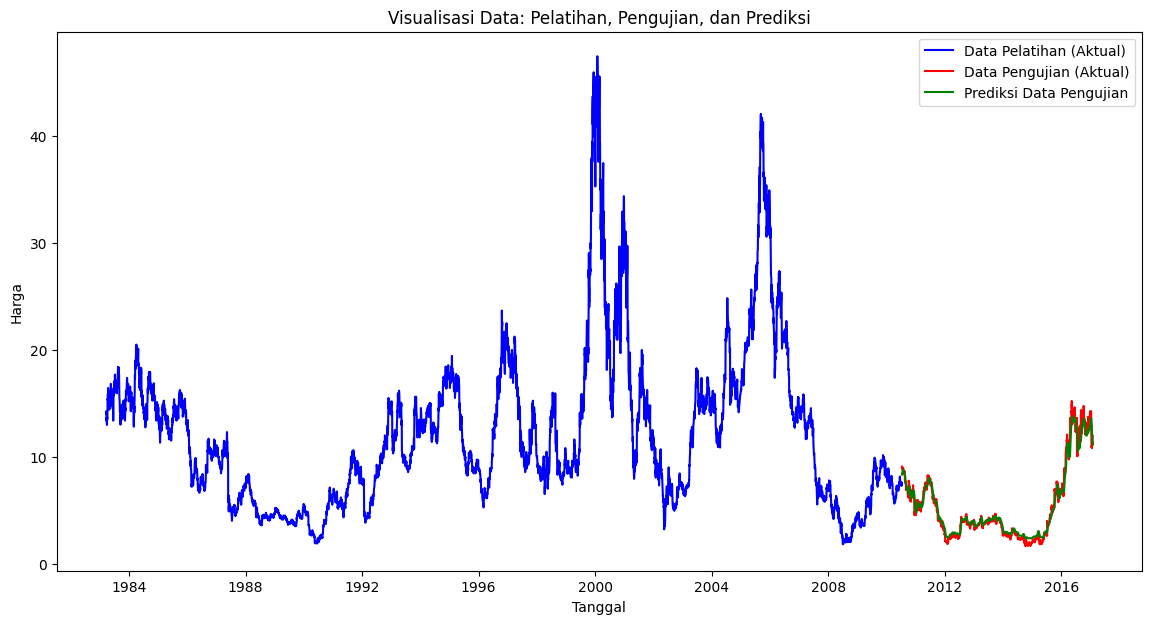

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


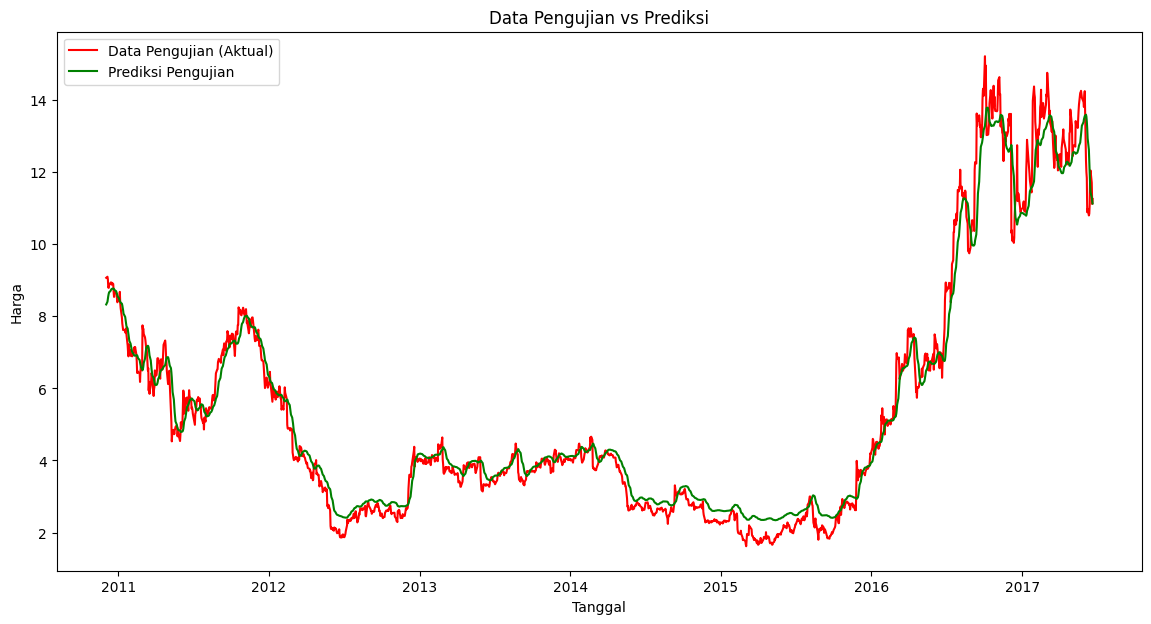

Kesalahan Kuadrat Rata-rata (MSE): 0.276


<ipython-input-17-83a0303a4cf6>:148: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = data['Close'].resample('Y').last()


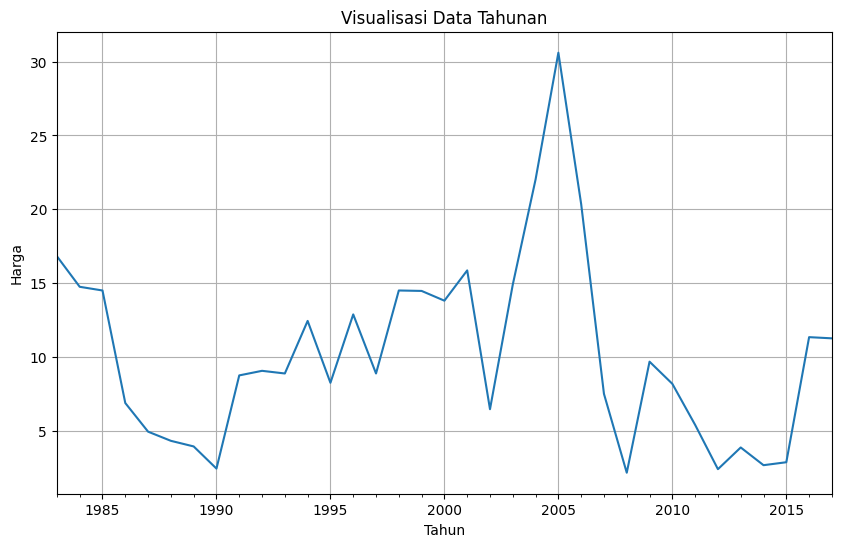

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1564
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1432
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1292
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1202
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1091
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0994
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0871
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0837
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0820
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0683
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0627
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0548
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0574
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0574
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0509
Epoch 16/150
1/1 ━━━━━━━━━━━━━━━━

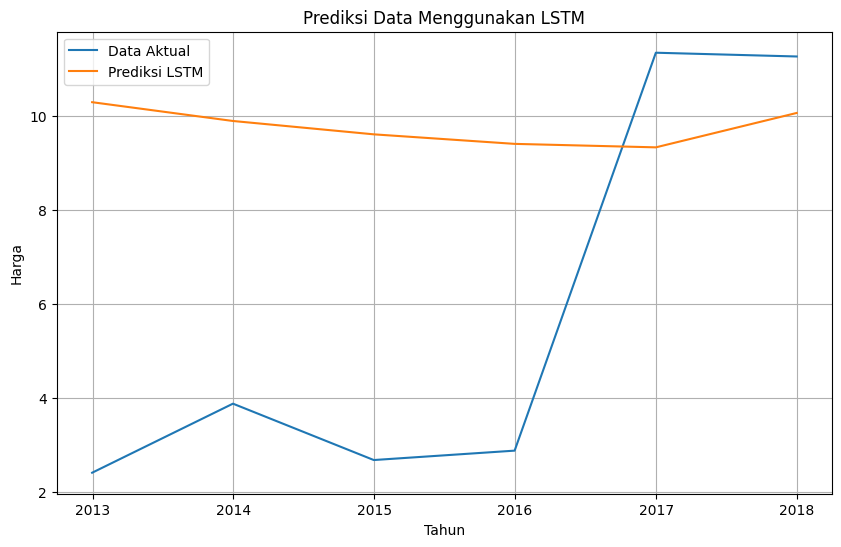

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-17-83a0303a4cf6>:232: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang


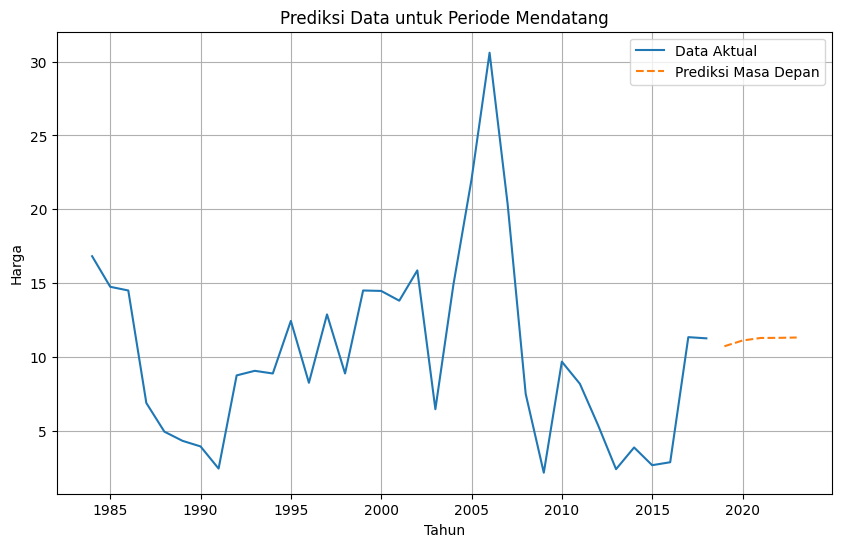

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

# Memuat data
data_file = 'amd.us.txt'
df = pd.read_csv(data_file, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Pilih kolom target
data = df[['Close']].values
print("Data Awal:")
print(df.head())
print(f"Bentuk Data: {df.shape}")
print(f"Kolom Data: {df.columns}")

# Grafik 1: Visualisasi Data
plt.figure(figsize=(12, 6))
df[['Close']].plot()
plt.title("Visualisasi Data")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.show()

# Grafik 2: Visualisasi Kumulatif
cumulative_values = df.cumsum()
plt.figure(figsize=(12, 6))
cumulative_values.plot()
plt.title("Visualisasi Kumulatif")
plt.show()

# Grafik 3: Plot Autokorelasi (Lag)
plt.figure(figsize=(10, 10))
lag_plot(df['Open'], lag=5)
plt.xlabel("Tanggal")
plt.title("Plot Autokorelasi (Lag 5)")
plt.show()

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membagi data pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan time steps
def create_dataset(dataset, time_steps=60):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 100
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model LSTM
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=1)

# Prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Membalikkan normalisasi untuk prediksi
train_predictions = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
test_predictions = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Membalikkan normalisasi untuk nilai aktual
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 4: Data Pelatihan, Pengujian, dan Prediksi
plt.figure(figsize=(14, 7))
plt.plot(df.index[:len(y_train_actual)], y_train_actual, label='Data Pelatihan (Aktual)', color='blue')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(y_test_actual)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(test_predictions)], test_predictions, label='Prediksi Data Pengujian', color='green')
plt.title('Visualisasi Data: Pelatihan, Pengujian, dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi n periode ke depan
forecasted_values = []
last_sequence = data_scaled[-time_steps:]

for i in range(5):
    forecast_input = last_sequence.reshape((1, time_steps, X_train.shape[2]))
    forecast_value = model.predict(forecast_input)
    forecasted_values.append(forecast_value[0, 0])
    last_sequence = np.append(last_sequence[1:], forecast_value, axis=0)

# Membalikkan normalisasi untuk nilai prediksi
forecasted_values = scaler.inverse_transform(
    np.concatenate((np.array(forecasted_values).reshape(-1, 1), np.zeros((len(forecasted_values), data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 5: Data Pengujian vs Prediksi
plt.figure(figsize=(14,7))
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], test_predictions, label='Prediksi Pengujian', color='green')
plt.title('Data Pengujian vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Menghitung kesalahan (MSE)
mse = mean_squared_error(y_test_actual, test_predictions)
print(f"Kesalahan Kuadrat Rata-rata (MSE): {mse:.3f}")


data = pd.read_csv(data_file, parse_dates=['Date'])

# Ubah kolom 'Tanggal' menjadi index
data.set_index('Date', inplace=True)

# Ambil hanya data nilai utama untuk analisis
data_yearly = data['Close'].resample('Y').last()

# Plot data tahunan
plt.figure(figsize=(10, 6))
data_yearly.plot()
plt.title('Visualisasi Data Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_yearly.values.reshape(-1, 1))

# Tentukan jumlah timesteps yang digunakan untuk prediksi
timesteps = 5

def create_dataset(data, timesteps=1):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

# Membuat dataset dengan timesteps
X, y = create_dataset(data_scaled, timesteps)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Mengembalikan nilai yang diprediksi ke skala asli
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot hasil prediksi vs data sebenarnya
plt.figure(figsize=(10, 6))

# Mendapatkan x-axis yang benar untuk data test
x_test_dates = data_yearly.index[train_size + timesteps:]  # Penyesuaian index untuk timesteps

plt.plot(x_test_dates, y_test_rescaled, label='Data Aktual')  # Gunakan x_test_dates untuk plotting
plt.plot(x_test_dates, y_pred_rescaled, label='Prediksi LSTM')  # Gunakan x_test_dates untuk plotting
plt.title('Prediksi Data Menggunakan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi untuk n periode ke depan
future_input = data_scaled[-timesteps:].reshape(1, timesteps, 1)
future_pred = []

for i in range(5):  # Prediksi untuk n periode (ubah 5 sesuai kebutuhan)
    pred = model.predict(future_input)
    future_pred.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_pred_rescaled = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))

# Menampilkan prediksi n periode ke depan
future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang
plt.figure(figsize=(10, 6))
plt.plot(data_yearly.index, data_yearly.values, label='Data Aktual')
plt.plot(future_years, future_pred_rescaled, label='Prediksi Masa Depan', linestyle='--')
plt.title('Prediksi Data untuk Periode Mendatang')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# **EEM**

Data Awal:
              Open    High     Low   Close   Volume  OpenInt
Date                                                        
2005-02-25  21.462  21.710  21.371  21.663  4014668        0
2005-02-28  21.850  21.850  21.530  21.627  3842727        0
2005-03-01  21.656  21.710  21.586  21.692  2924014        0
2005-03-02  21.505  21.530  21.310  21.329  4651558        0
2005-03-03  21.505  21.505  21.266  21.389  6786069        0
Bentuk Data: (3201, 6)
Kolom Data: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1200x600 with 0 Axes>

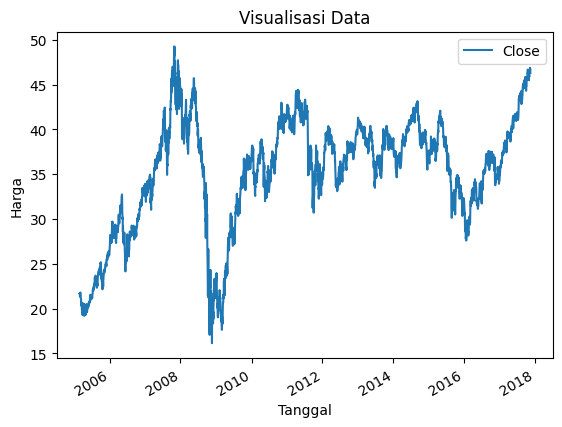

<Figure size 1200x600 with 0 Axes>

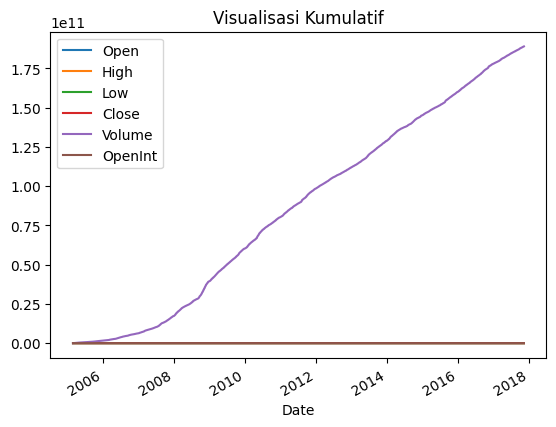

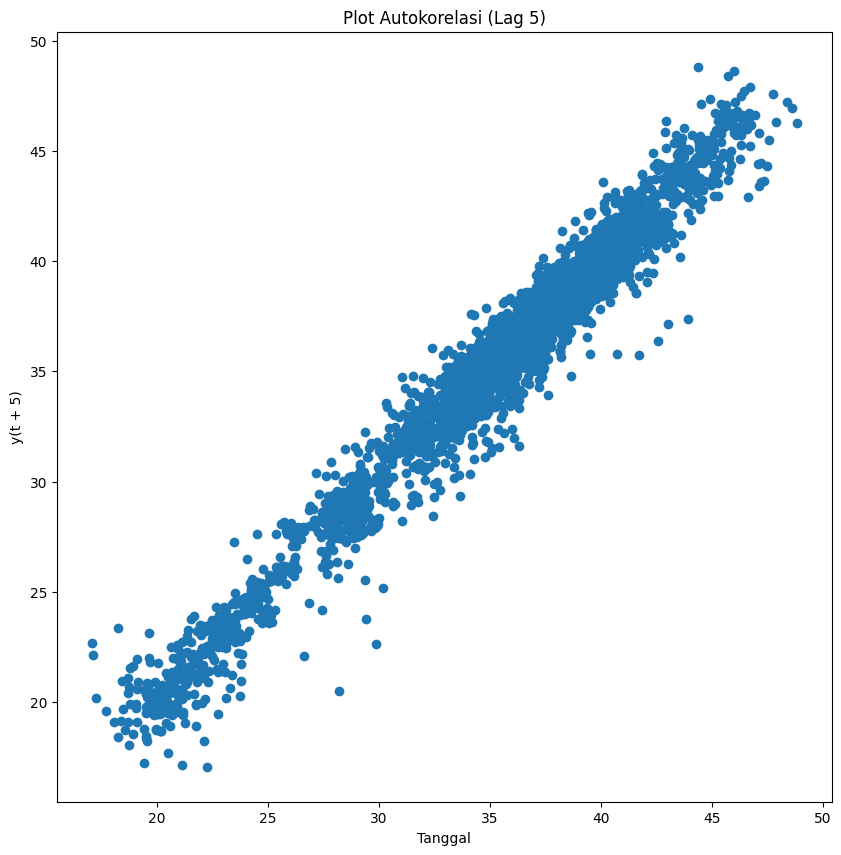

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 552ms/step - loss: 0.0574 - val_loss: 7.4292e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step


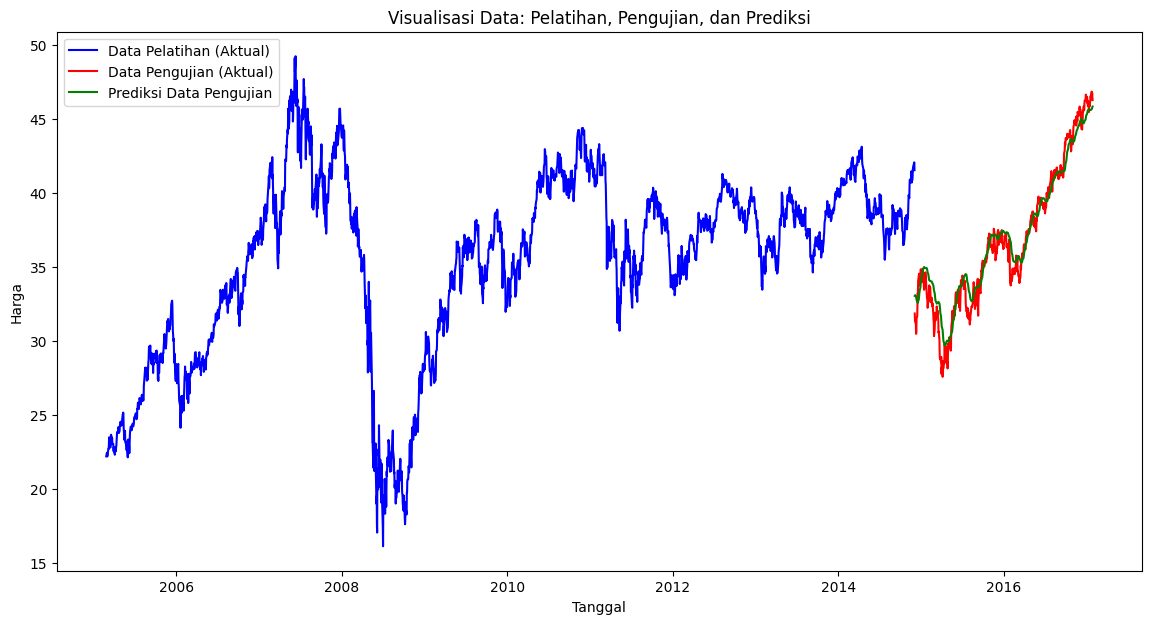

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


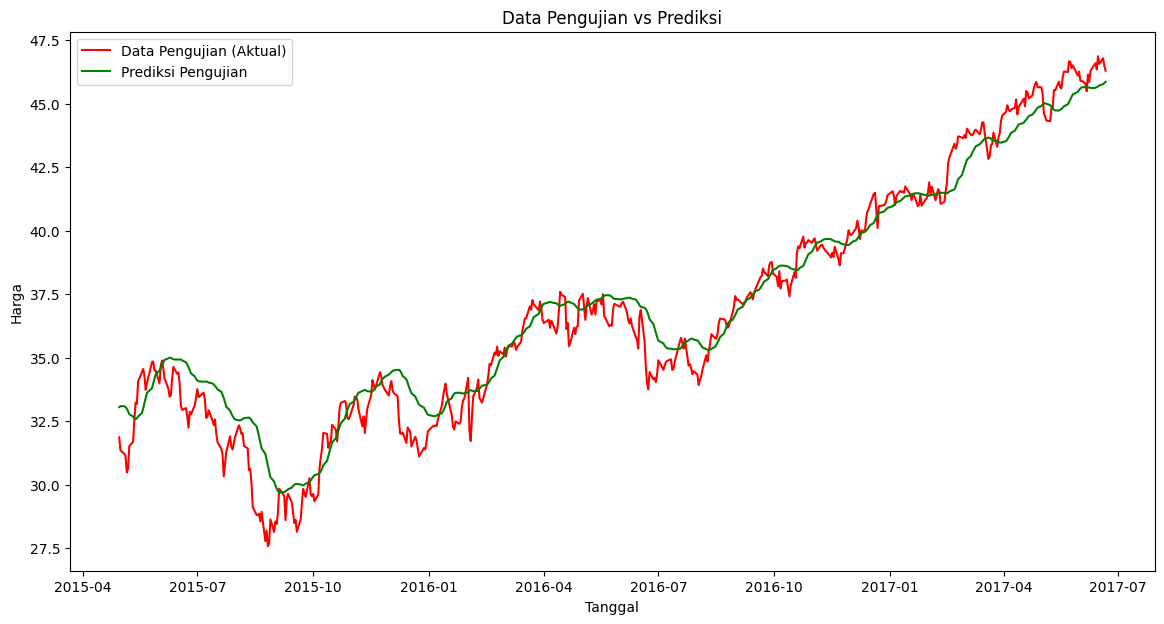

Kesalahan Kuadrat Rata-rata (MSE): 1.066


<ipython-input-18-0ab3cd60cf04>:148: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = data['Close'].resample('Y').last()


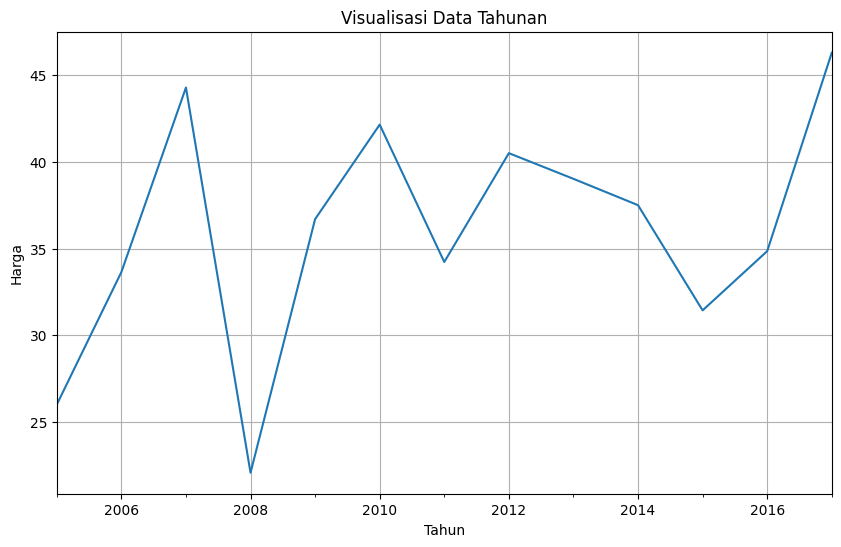

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4246
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3727
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3532
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3182
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2950
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2627
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2411
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2088
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1849
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1562
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1279
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1218
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1021
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0812
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0600
Epoch 16/150
1/1 ━━━━━━━━━━━━━━━━

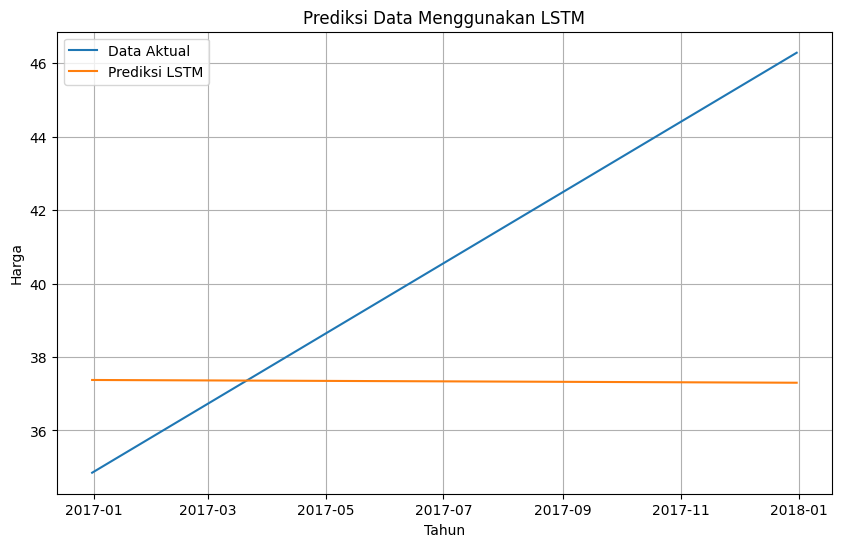

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<ipython-input-18-0ab3cd60cf04>:232: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang


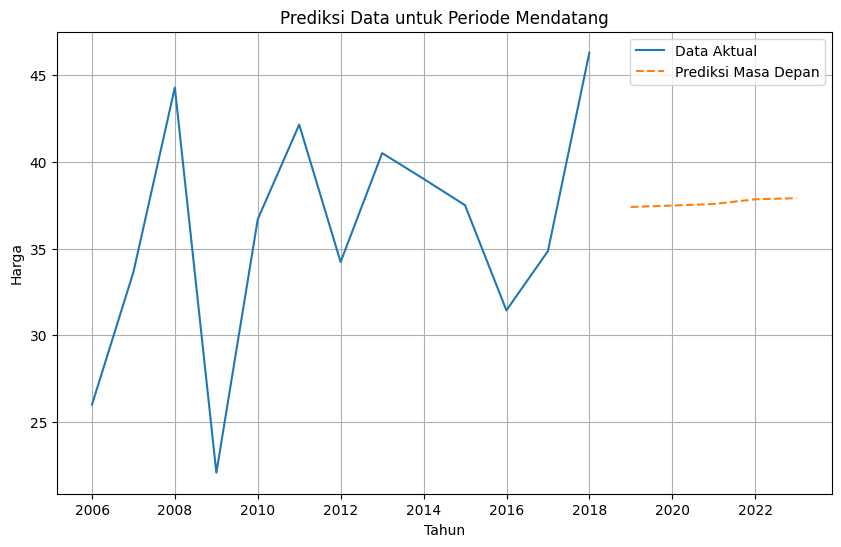

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

# Memuat data
data_file = 'eem.us.txt'
df = pd.read_csv(data_file, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Pilih kolom target
data = df[['Close']].values
print("Data Awal:")
print(df.head())
print(f"Bentuk Data: {df.shape}")
print(f"Kolom Data: {df.columns}")

# Grafik 1: Visualisasi Data
plt.figure(figsize=(12, 6))
df[['Close']].plot()
plt.title("Visualisasi Data")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.show()

# Grafik 2: Visualisasi Kumulatif
cumulative_values = df.cumsum()
plt.figure(figsize=(12, 6))
cumulative_values.plot()
plt.title("Visualisasi Kumulatif")
plt.show()

# Grafik 3: Plot Autokorelasi (Lag)
plt.figure(figsize=(10, 10))
lag_plot(df['Open'], lag=5)
plt.xlabel("Tanggal")
plt.title("Plot Autokorelasi (Lag 5)")
plt.show()

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membagi data pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan time steps
def create_dataset(dataset, time_steps=60):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 100
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model LSTM
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

# Prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Membalikkan normalisasi untuk prediksi
train_predictions = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
test_predictions = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Membalikkan normalisasi untuk nilai aktual
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 4: Data Pelatihan, Pengujian, dan Prediksi
plt.figure(figsize=(14, 7))
plt.plot(df.index[:len(y_train_actual)], y_train_actual, label='Data Pelatihan (Aktual)', color='blue')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(y_test_actual)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(test_predictions)], test_predictions, label='Prediksi Data Pengujian', color='green')
plt.title('Visualisasi Data: Pelatihan, Pengujian, dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi n periode ke depan
forecasted_values = []
last_sequence = data_scaled[-time_steps:]

for i in range(5):
    forecast_input = last_sequence.reshape((1, time_steps, X_train.shape[2]))
    forecast_value = model.predict(forecast_input)
    forecasted_values.append(forecast_value[0, 0])
    last_sequence = np.append(last_sequence[1:], forecast_value, axis=0)

# Membalikkan normalisasi untuk nilai prediksi
forecasted_values = scaler.inverse_transform(
    np.concatenate((np.array(forecasted_values).reshape(-1, 1), np.zeros((len(forecasted_values), data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 5: Data Pengujian vs Prediksi
plt.figure(figsize=(14,7))
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], test_predictions, label='Prediksi Pengujian', color='green')
plt.title('Data Pengujian vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Menghitung kesalahan (MSE)
mse = mean_squared_error(y_test_actual, test_predictions)
print(f"Kesalahan Kuadrat Rata-rata (MSE): {mse:.3f}")


data = pd.read_csv(data_file, parse_dates=['Date'])

# Ubah kolom 'Tanggal' menjadi index
data.set_index('Date', inplace=True)

# Ambil hanya data nilai utama untuk analisis
data_yearly = data['Close'].resample('Y').last()

# Plot data tahunan
plt.figure(figsize=(10, 6))
data_yearly.plot()
plt.title('Visualisasi Data Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_yearly.values.reshape(-1, 1))

# Tentukan jumlah timesteps yang digunakan untuk prediksi
timesteps = 5

def create_dataset(data, timesteps=1):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

# Membuat dataset dengan timesteps
X, y = create_dataset(data_scaled, timesteps)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Mengembalikan nilai yang diprediksi ke skala asli
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot hasil prediksi vs data sebenarnya
plt.figure(figsize=(10, 6))

# Mendapatkan x-axis yang benar untuk data test
x_test_dates = data_yearly.index[train_size + timesteps:]  # Penyesuaian index untuk timesteps

plt.plot(x_test_dates, y_test_rescaled, label='Data Aktual')  # Gunakan x_test_dates untuk plotting
plt.plot(x_test_dates, y_pred_rescaled, label='Prediksi LSTM')  # Gunakan x_test_dates untuk plotting
plt.title('Prediksi Data Menggunakan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi untuk n periode ke depan
future_input = data_scaled[-timesteps:].reshape(1, timesteps, 1)
future_pred = []

for i in range(5):  # Prediksi untuk n periode (ubah 5 sesuai kebutuhan)
    pred = model.predict(future_input)
    future_pred.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_pred_rescaled = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))

# Menampilkan prediksi n periode ke depan
future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang
plt.figure(figsize=(10, 6))
plt.plot(data_yearly.index, data_yearly.values, label='Data Aktual')
plt.plot(future_years, future_pred_rescaled, label='Prediksi Masa Depan', linestyle='--')
plt.title('Prediksi Data untuk Periode Mendatang')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


# **INTC**

Data Awal:
               Open     High      Low    Close   Volume  OpenInt
Date                                                            
1972-01-07  0.01592  0.01592  0.01592  0.01592  3787746        0
1972-01-14  0.00791  0.00791  0.00791  0.00791  7878523        0
1972-01-21  0.00791  0.00791  0.00791  0.00791  1060564        0
1972-01-24  0.00791  0.00791  0.00791  0.00791  6060405        0
1972-01-25  0.00791  0.00791  0.00791  0.00791  1060564        0
Bentuk Data: (11556, 6)
Kolom Data: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1200x600 with 0 Axes>

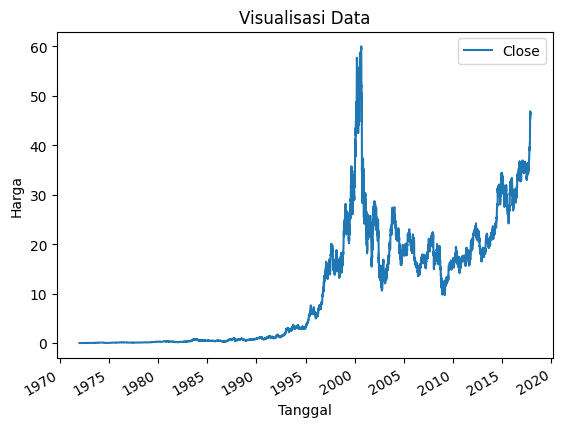

<Figure size 1200x600 with 0 Axes>

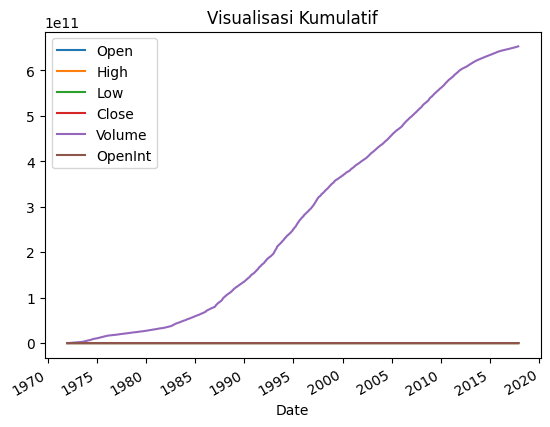

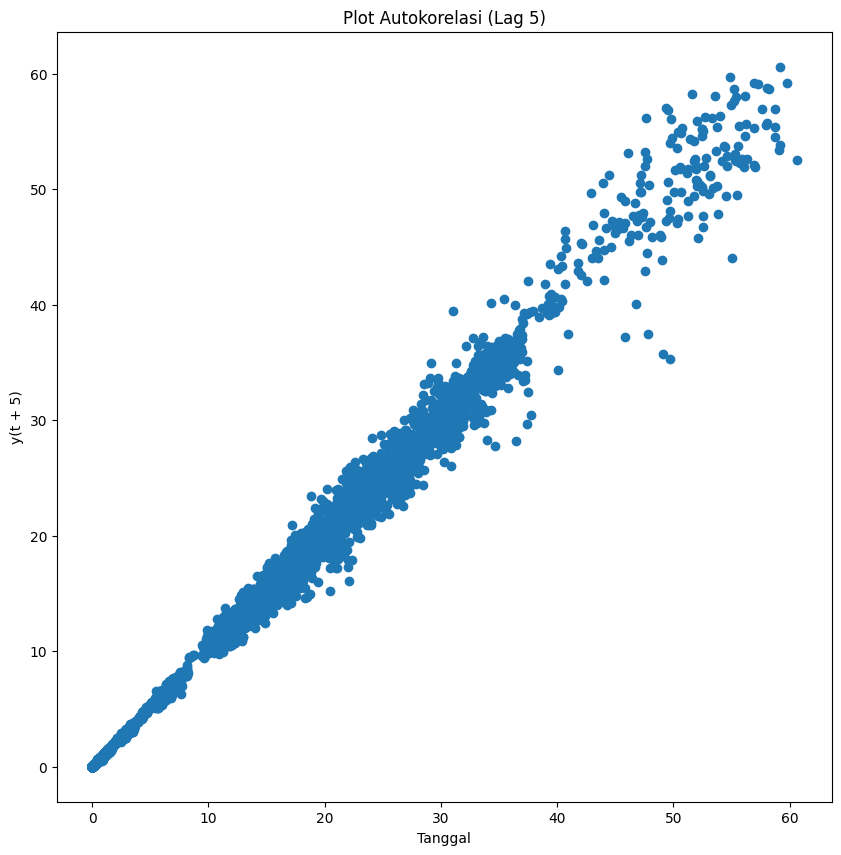

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 144s 539ms/step - loss: 0.0049 - val_loss: 3.1262e-04
286/286 ━━━━━━━━━━━━━━━━━━━━ 44s 152ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step


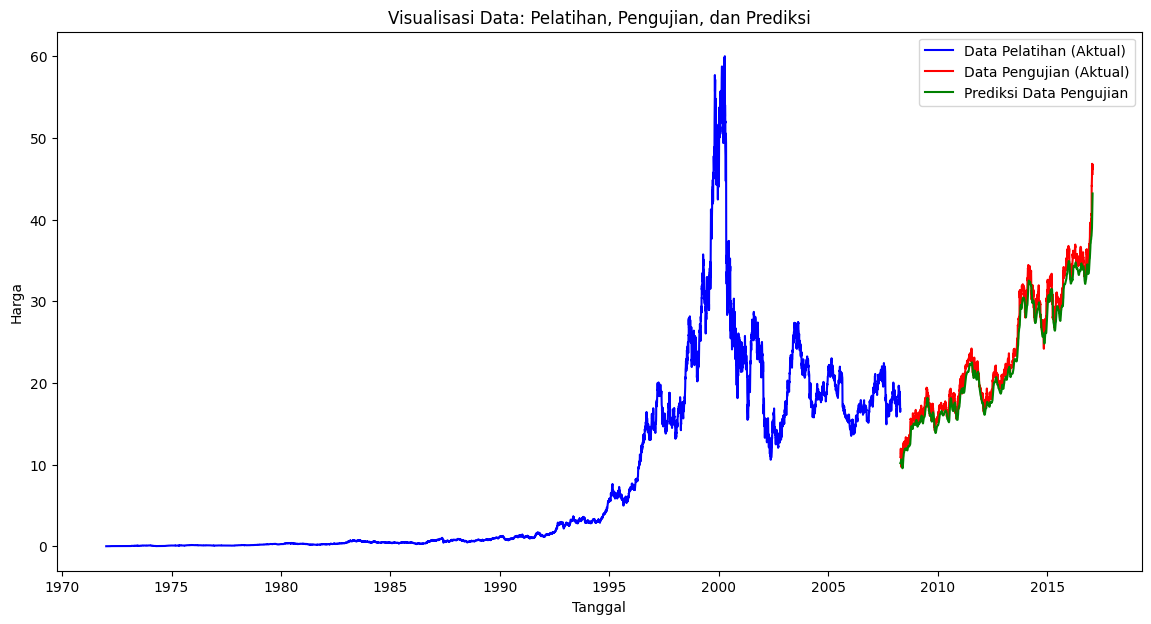

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


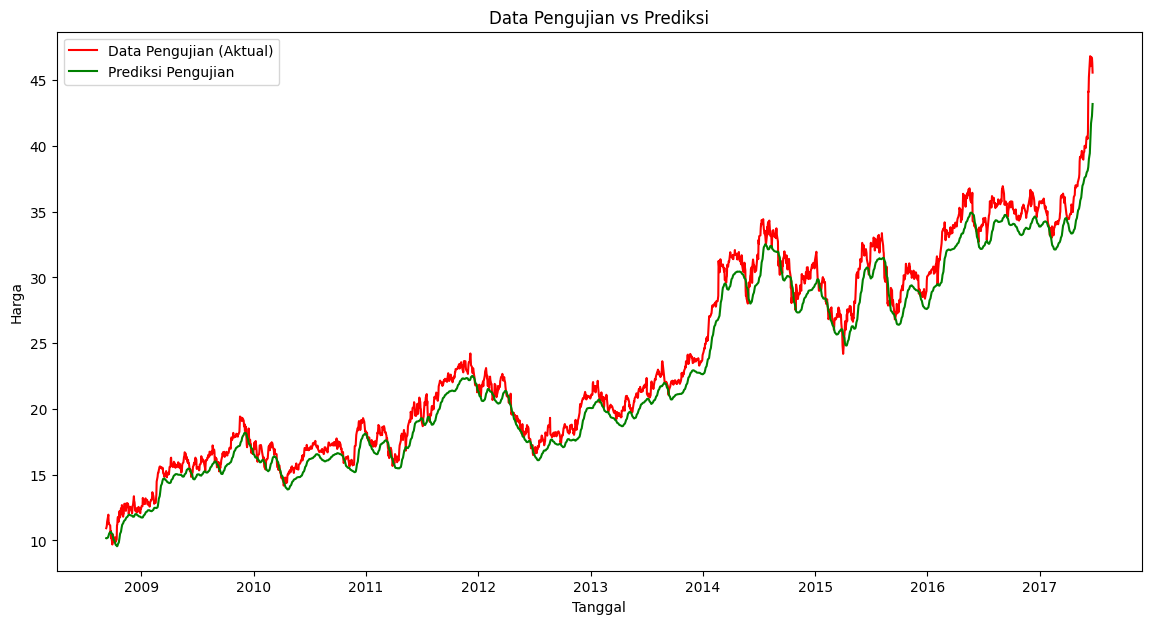

Kesalahan Kuadrat Rata-rata (MSE): 1.892


<ipython-input-19-1c556607552f>:148: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = data['Close'].resample('Y').last()


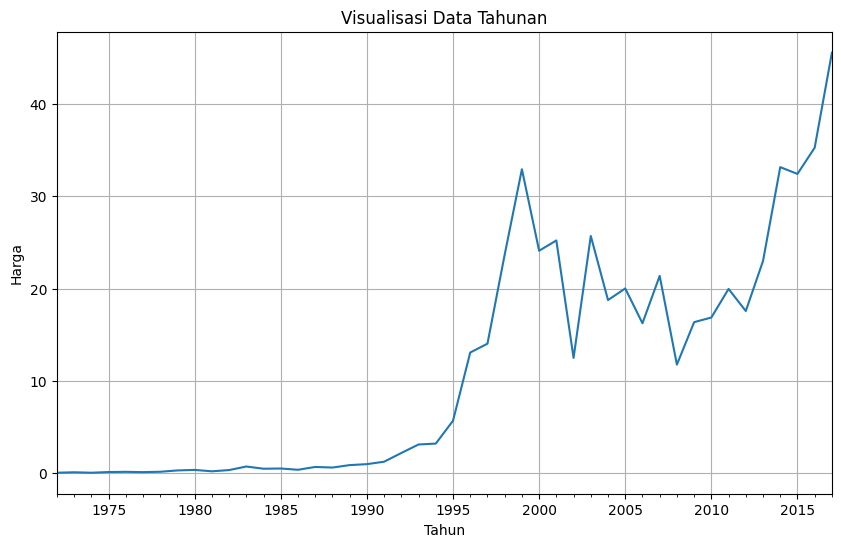

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0813
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0747
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0688
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0619
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0566
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0508
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0457
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0399
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0386
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0340
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0308
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0302
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0268
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0274
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0271
Epoch 16/150
1/1 ━━━━━━━━━━━

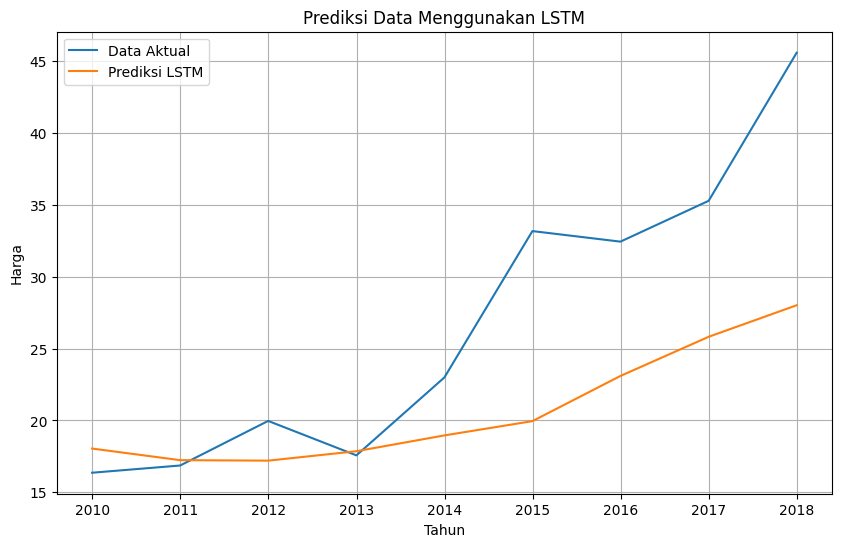

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<ipython-input-19-1c556607552f>:232: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang


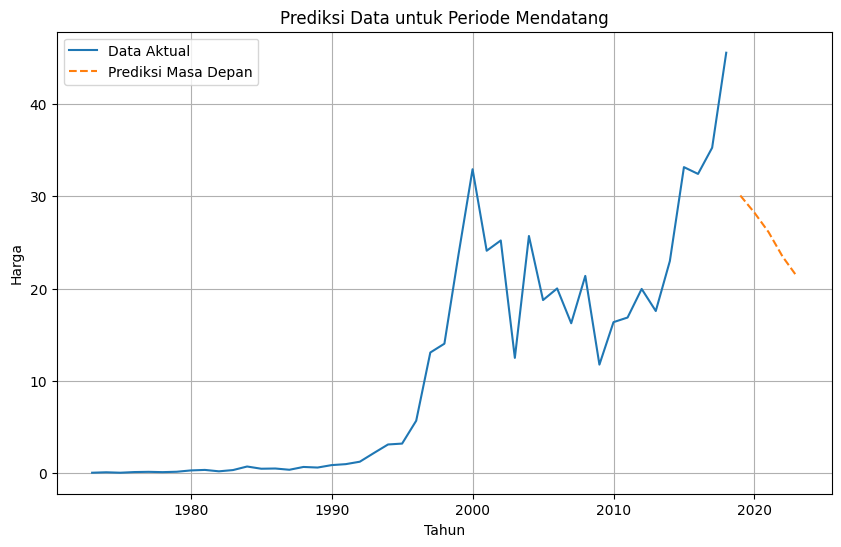

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

# Memuat data
data_file = 'intc.us.txt'
df = pd.read_csv(data_file, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Pilih kolom target
data = df[['Close']].values
print("Data Awal:")
print(df.head())
print(f"Bentuk Data: {df.shape}")
print(f"Kolom Data: {df.columns}")

# Grafik 1: Visualisasi Data
plt.figure(figsize=(12, 6))
df[['Close']].plot()
plt.title("Visualisasi Data")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.show()

# Grafik 2: Visualisasi Kumulatif
cumulative_values = df.cumsum()
plt.figure(figsize=(12, 6))
cumulative_values.plot()
plt.title("Visualisasi Kumulatif")
plt.show()

# Grafik 3: Plot Autokorelasi (Lag)
plt.figure(figsize=(10, 10))
lag_plot(df['Open'], lag=5)
plt.xlabel("Tanggal")
plt.title("Plot Autokorelasi (Lag 5)")
plt.show()

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membagi data pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan time steps
def create_dataset(dataset, time_steps=60):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 100
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model LSTM
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=1)

# Prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Membalikkan normalisasi untuk prediksi
train_predictions = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
test_predictions = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Membalikkan normalisasi untuk nilai aktual
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 4: Data Pelatihan, Pengujian, dan Prediksi
plt.figure(figsize=(14, 7))
plt.plot(df.index[:len(y_train_actual)], y_train_actual, label='Data Pelatihan (Aktual)', color='blue')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(y_test_actual)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(test_predictions)], test_predictions, label='Prediksi Data Pengujian', color='green')
plt.title('Visualisasi Data: Pelatihan, Pengujian, dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi n periode ke depan
forecasted_values = []
last_sequence = data_scaled[-time_steps:]

for i in range(5):
    forecast_input = last_sequence.reshape((1, time_steps, X_train.shape[2]))
    forecast_value = model.predict(forecast_input)
    forecasted_values.append(forecast_value[0, 0])
    last_sequence = np.append(last_sequence[1:], forecast_value, axis=0)

# Membalikkan normalisasi untuk nilai prediksi
forecasted_values = scaler.inverse_transform(
    np.concatenate((np.array(forecasted_values).reshape(-1, 1), np.zeros((len(forecasted_values), data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 5: Data Pengujian vs Prediksi
plt.figure(figsize=(14,7))
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], test_predictions, label='Prediksi Pengujian', color='green')
plt.title('Data Pengujian vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Menghitung kesalahan (MSE)
mse = mean_squared_error(y_test_actual, test_predictions)
print(f"Kesalahan Kuadrat Rata-rata (MSE): {mse:.3f}")


data = pd.read_csv(data_file, parse_dates=['Date'])

# Ubah kolom 'Tanggal' menjadi index
data.set_index('Date', inplace=True)

# Ambil hanya data nilai utama untuk analisis
data_yearly = data['Close'].resample('Y').last()

# Plot data tahunan
plt.figure(figsize=(10, 6))
data_yearly.plot()
plt.title('Visualisasi Data Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_yearly.values.reshape(-1, 1))

# Tentukan jumlah timesteps yang digunakan untuk prediksi
timesteps = 5

def create_dataset(data, timesteps=1):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

# Membuat dataset dengan timesteps
X, y = create_dataset(data_scaled, timesteps)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Mengembalikan nilai yang diprediksi ke skala asli
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot hasil prediksi vs data sebenarnya
plt.figure(figsize=(10, 6))

# Mendapatkan x-axis yang benar untuk data test
x_test_dates = data_yearly.index[train_size + timesteps:]  # Penyesuaian index untuk timesteps

plt.plot(x_test_dates, y_test_rescaled, label='Data Aktual')  # Gunakan x_test_dates untuk plotting
plt.plot(x_test_dates, y_pred_rescaled, label='Prediksi LSTM')  # Gunakan x_test_dates untuk plotting
plt.title('Prediksi Data Menggunakan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi untuk n periode ke depan
future_input = data_scaled[-timesteps:].reshape(1, timesteps, 1)
future_pred = []

for i in range(5):  # Prediksi untuk n periode (ubah 5 sesuai kebutuhan)
    pred = model.predict(future_input)
    future_pred.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_pred_rescaled = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))

# Menampilkan prediksi n periode ke depan
future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang
plt.figure(figsize=(10, 6))
plt.plot(data_yearly.index, data_yearly.values, label='Data Aktual')
plt.plot(future_years, future_pred_rescaled, label='Prediksi Masa Depan', linestyle='--')
plt.title('Prediksi Data untuk Periode Mendatang')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


# **QCOM**

Data Awal:
               Open     High      Low    Close     Volume  OpenInt
Date                                                              
1991-12-16  0.43127  0.49019  0.43127  0.46503  169934395        0
1991-12-17  0.47355  0.47355  0.45633  0.45633   19133515        0
1991-12-18  0.45633  0.47355  0.45633  0.47355   12891941        0
1991-12-19  0.47355  0.47355  0.45633  0.45633    8633742        0
1991-12-20  0.45633  0.47355  0.45633  0.46503    6192370        0
Bentuk Data: (6527, 6)
Kolom Data: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1200x600 with 0 Axes>

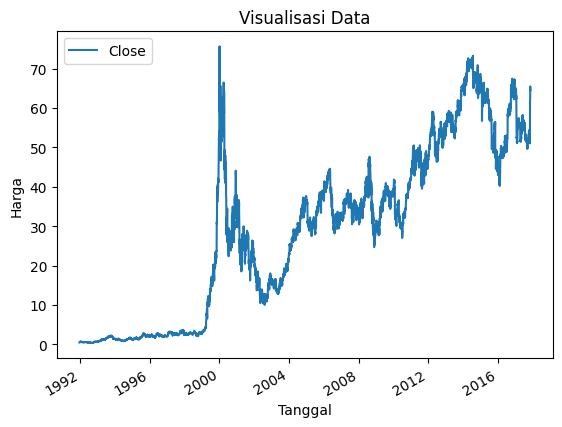

<Figure size 1200x600 with 0 Axes>

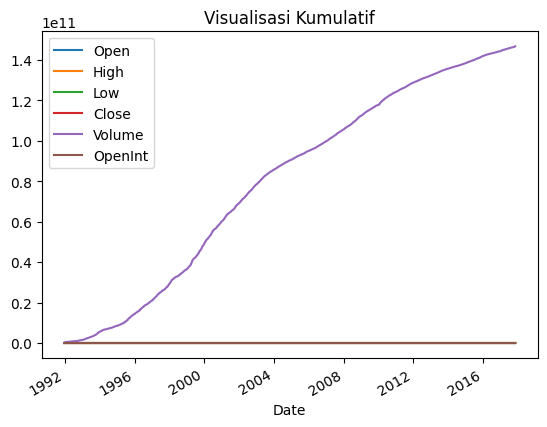

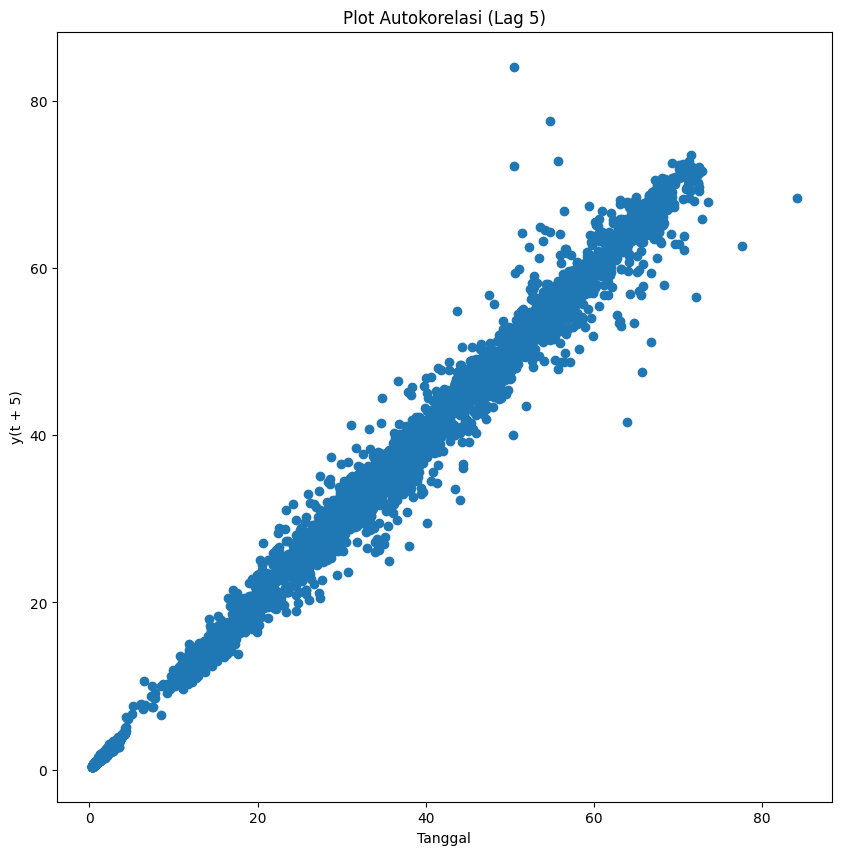

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 76s 506ms/step - loss: 0.0139 - val_loss: 7.7428e-04
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step


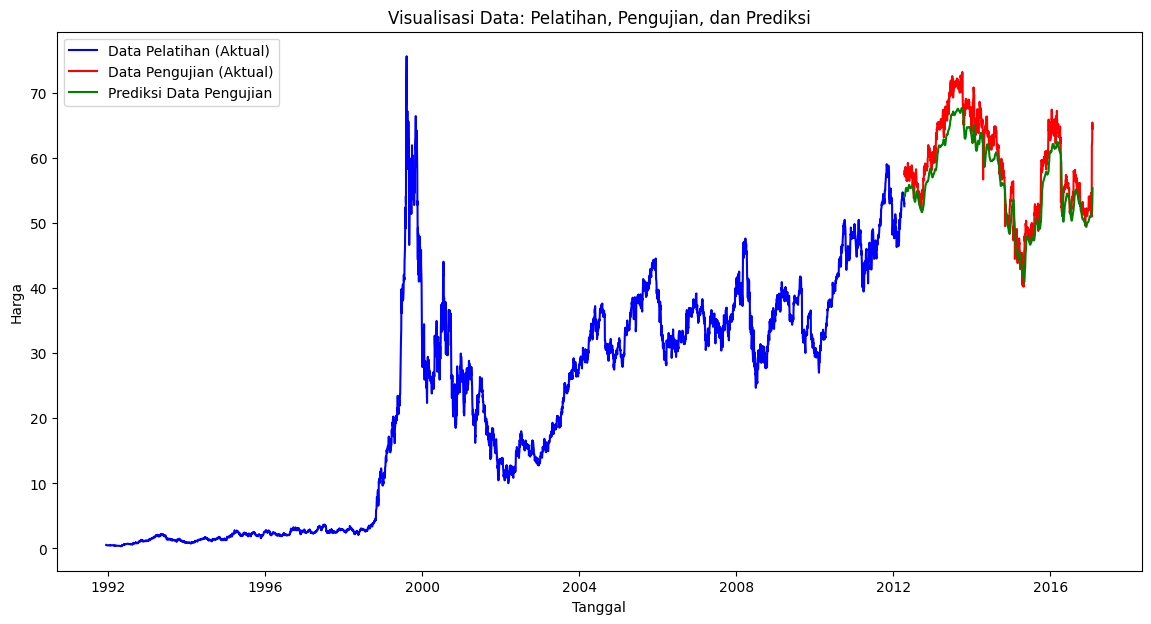

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


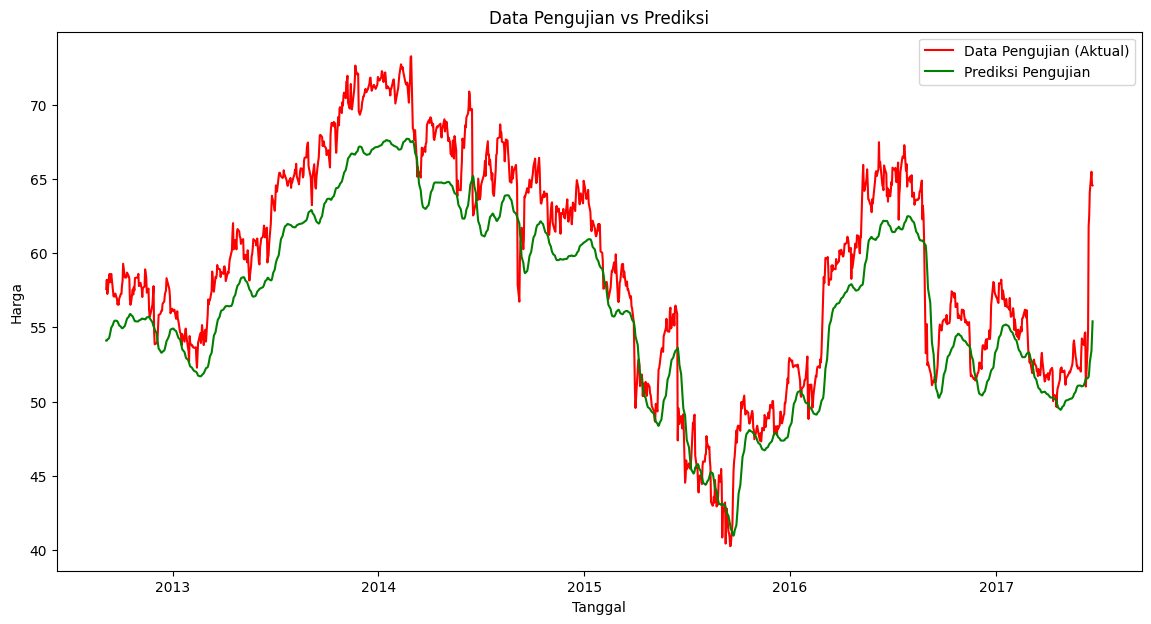

Kesalahan Kuadrat Rata-rata (MSE): 10.210


<ipython-input-20-f68d23136534>:148: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = data['Close'].resample('Y').last()


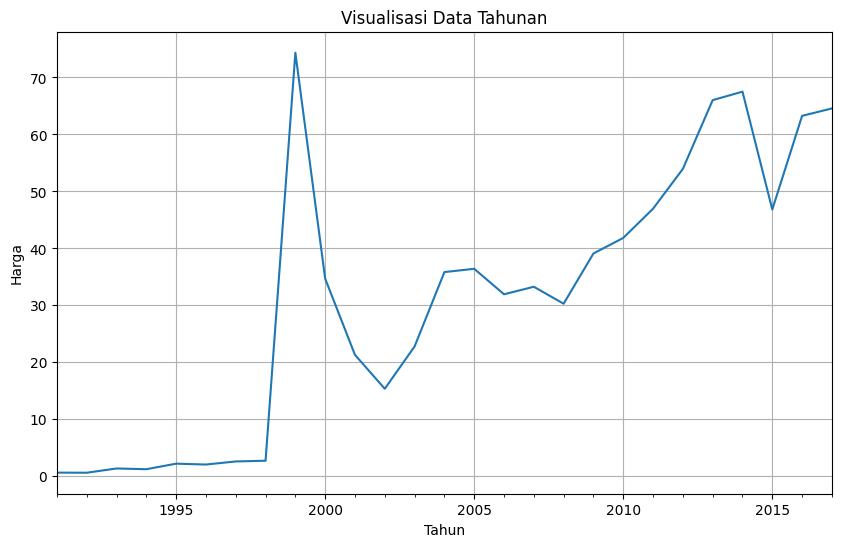

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2536
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2393
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2221
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2086
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1918
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1793
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1657
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1515
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1394
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1294
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1202
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1078
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0951
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0845
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0733
Epoch 16/150
1/1 ━━━━

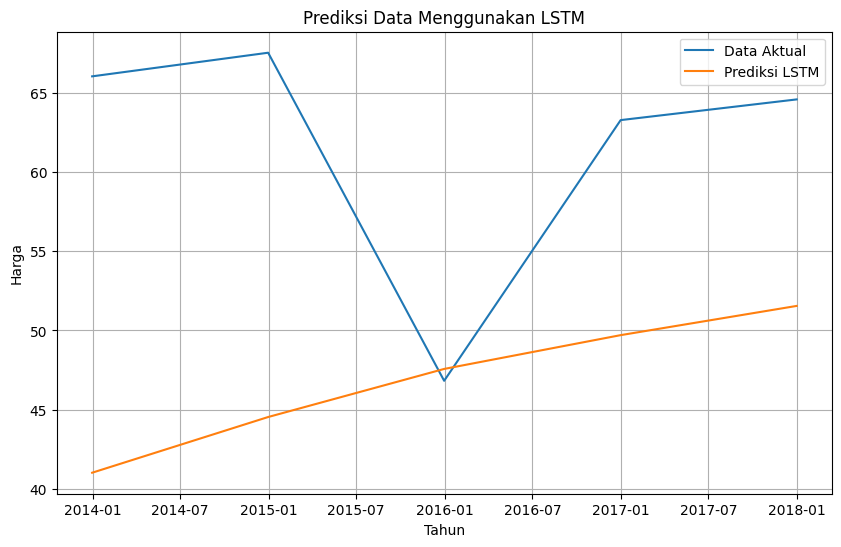

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-20-f68d23136534>:232: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang


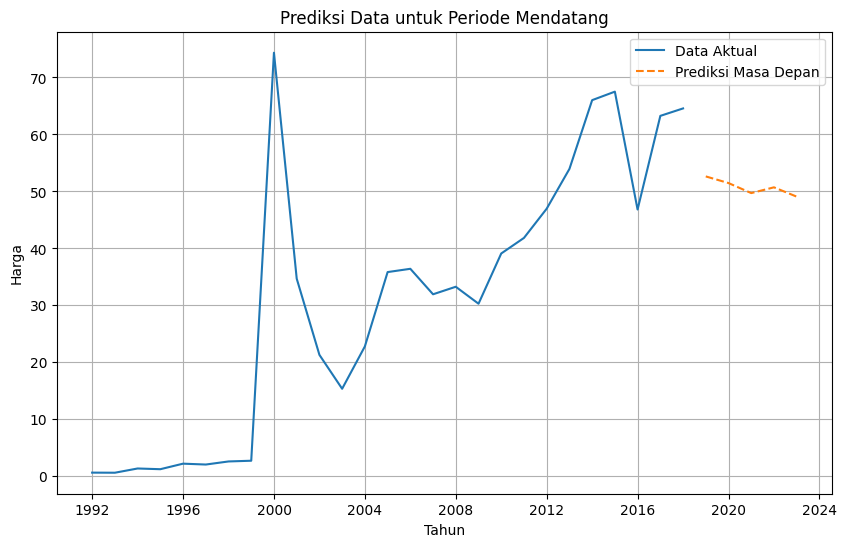

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

# Memuat data
data_file = 'qcom.us.txt'
df = pd.read_csv(data_file, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Pilih kolom target
data = df[['Close']].values
print("Data Awal:")
print(df.head())
print(f"Bentuk Data: {df.shape}")
print(f"Kolom Data: {df.columns}")

# Grafik 1: Visualisasi Data
plt.figure(figsize=(12, 6))
df[['Close']].plot()
plt.title("Visualisasi Data")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.show()

# Grafik 2: Visualisasi Kumulatif
cumulative_values = df.cumsum()
plt.figure(figsize=(12, 6))
cumulative_values.plot()
plt.title("Visualisasi Kumulatif")
plt.show()

# Grafik 3: Plot Autokorelasi (Lag)
plt.figure(figsize=(10, 10))
lag_plot(df['Open'], lag=5)
plt.xlabel("Tanggal")
plt.title("Plot Autokorelasi (Lag 5)")
plt.show()

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membagi data pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan time steps
def create_dataset(dataset, time_steps=60):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 100
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model LSTM
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=1)

# Prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Membalikkan normalisasi untuk prediksi
train_predictions = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
test_predictions = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Membalikkan normalisasi untuk nilai aktual
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 4: Data Pelatihan, Pengujian, dan Prediksi
plt.figure(figsize=(14, 7))
plt.plot(df.index[:len(y_train_actual)], y_train_actual, label='Data Pelatihan (Aktual)', color='blue')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(y_test_actual)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(test_predictions)], test_predictions, label='Prediksi Data Pengujian', color='green')
plt.title('Visualisasi Data: Pelatihan, Pengujian, dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi n periode ke depan
forecasted_values = []
last_sequence = data_scaled[-time_steps:]

for i in range(5):
    forecast_input = last_sequence.reshape((1, time_steps, X_train.shape[2]))
    forecast_value = model.predict(forecast_input)
    forecasted_values.append(forecast_value[0, 0])
    last_sequence = np.append(last_sequence[1:], forecast_value, axis=0)

# Membalikkan normalisasi untuk nilai prediksi
forecasted_values = scaler.inverse_transform(
    np.concatenate((np.array(forecasted_values).reshape(-1, 1), np.zeros((len(forecasted_values), data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 5: Data Pengujian vs Prediksi
plt.figure(figsize=(14,7))
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], test_predictions, label='Prediksi Pengujian', color='green')
plt.title('Data Pengujian vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Menghitung kesalahan (MSE)
mse = mean_squared_error(y_test_actual, test_predictions)
print(f"Kesalahan Kuadrat Rata-rata (MSE): {mse:.3f}")


data = pd.read_csv(data_file, parse_dates=['Date'])

# Ubah kolom 'Tanggal' menjadi index
data.set_index('Date', inplace=True)

# Ambil hanya data nilai utama untuk analisis
data_yearly = data['Close'].resample('Y').last()

# Plot data tahunan
plt.figure(figsize=(10, 6))
data_yearly.plot()
plt.title('Visualisasi Data Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_yearly.values.reshape(-1, 1))

# Tentukan jumlah timesteps yang digunakan untuk prediksi
timesteps = 5

def create_dataset(data, timesteps=1):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

# Membuat dataset dengan timesteps
X, y = create_dataset(data_scaled, timesteps)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Mengembalikan nilai yang diprediksi ke skala asli
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot hasil prediksi vs data sebenarnya
plt.figure(figsize=(10, 6))

# Mendapatkan x-axis yang benar untuk data test
x_test_dates = data_yearly.index[train_size + timesteps:]  # Penyesuaian index untuk timesteps

plt.plot(x_test_dates, y_test_rescaled, label='Data Aktual')  # Gunakan x_test_dates untuk plotting
plt.plot(x_test_dates, y_pred_rescaled, label='Prediksi LSTM')  # Gunakan x_test_dates untuk plotting
plt.title('Prediksi Data Menggunakan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi untuk n periode ke depan
future_input = data_scaled[-timesteps:].reshape(1, timesteps, 1)
future_pred = []

for i in range(5):  # Prediksi untuk n periode (ubah 5 sesuai kebutuhan)
    pred = model.predict(future_input)
    future_pred.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_pred_rescaled = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))

# Menampilkan prediksi n periode ke depan
future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang
plt.figure(figsize=(10, 6))
plt.plot(data_yearly.index, data_yearly.values, label='Data Aktual')
plt.plot(future_years, future_pred_rescaled, label='Prediksi Masa Depan', linestyle='--')
plt.title('Prediksi Data untuk Periode Mendatang')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


# **SPY**

Data Awal:
              Open    High     Low   Close    Volume  OpenInt
Date                                                         
2005-02-25  104.77  106.00  104.68  105.79  70221808        0
2005-02-28  105.55  105.68  104.56  105.08  79695344        0
2005-03-01  105.22  105.87  105.22  105.62  54607412        0
2005-03-02  105.21  106.22  105.10  105.57  73733090        0
2005-03-03  105.99  106.20  105.15  105.61  71286823        0
Bentuk Data: (3201, 6)
Kolom Data: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1200x600 with 0 Axes>

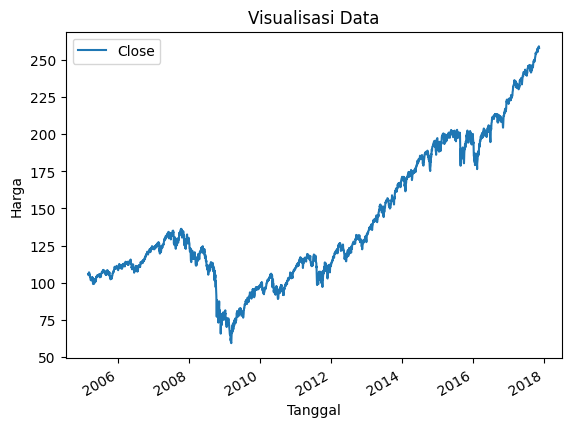

<Figure size 1200x600 with 0 Axes>

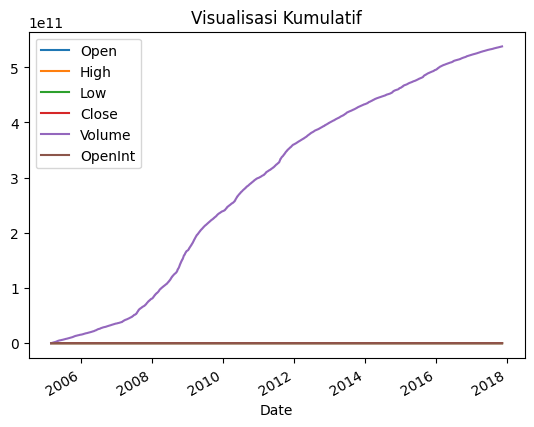

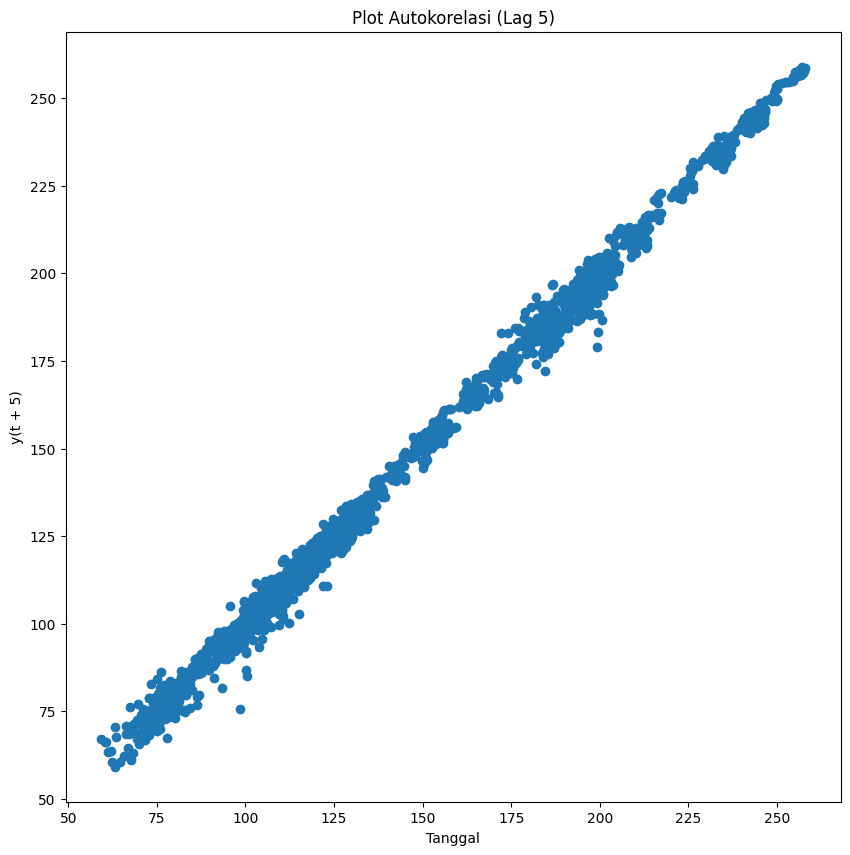

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 526ms/step - loss: 0.0172 - val_loss: 2.5899e-04
Epoch 2/2
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 505ms/step - loss: 7.5197e-04 - val_loss: 0.0024
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step


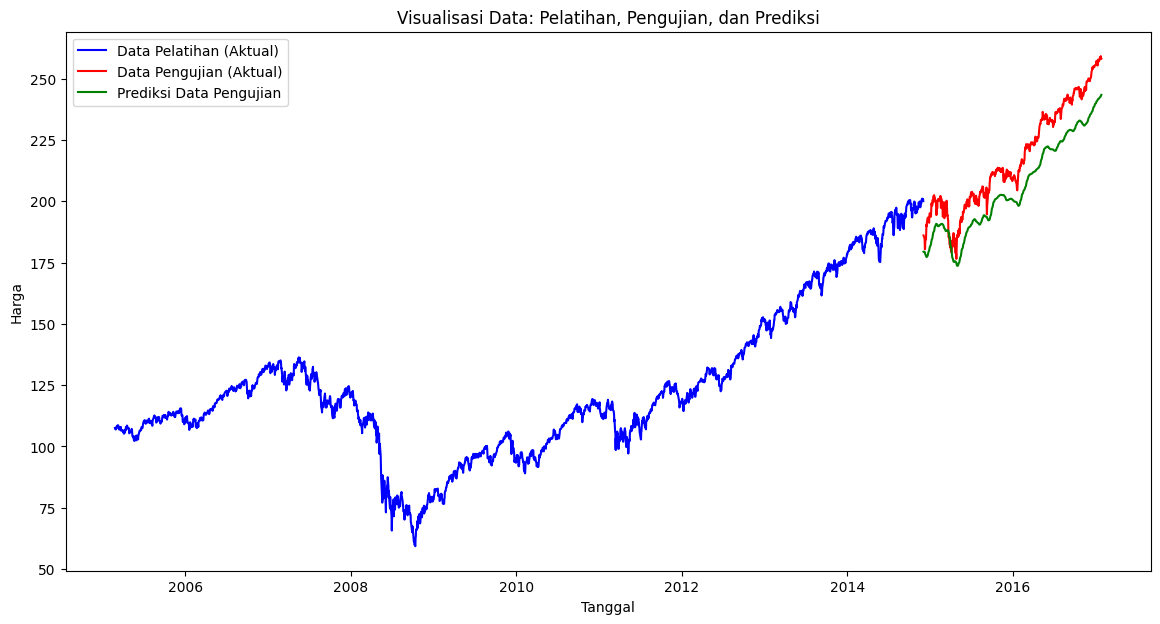

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


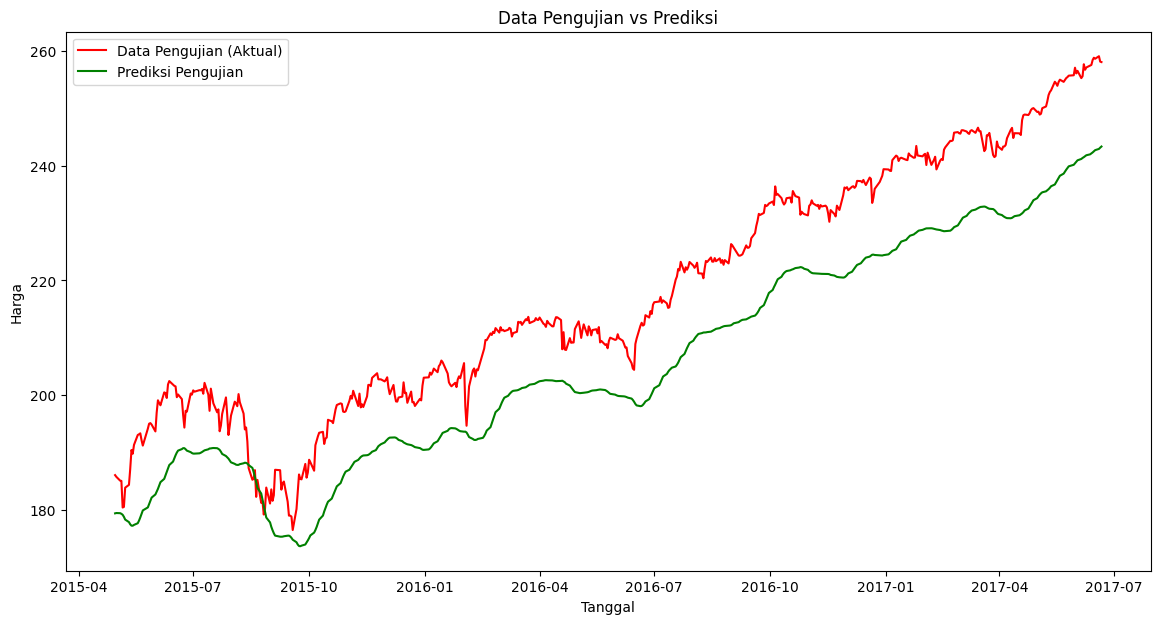

Kesalahan Kuadrat Rata-rata (MSE): 147.605


<ipython-input-2-352c59adac50>:148: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = data['Close'].resample('Y').last()


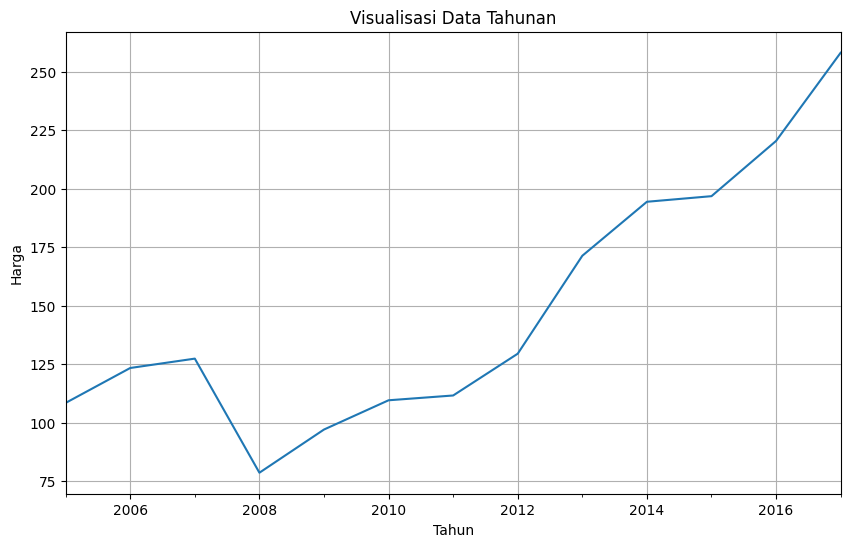

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2244
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2129
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1987
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1844
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1745
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1547
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1561
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1431
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1357
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1130
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1048
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0954
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0904
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0812
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0613
Epoch 16/150
1/1 ━━━━━━━━━━━━━━━━

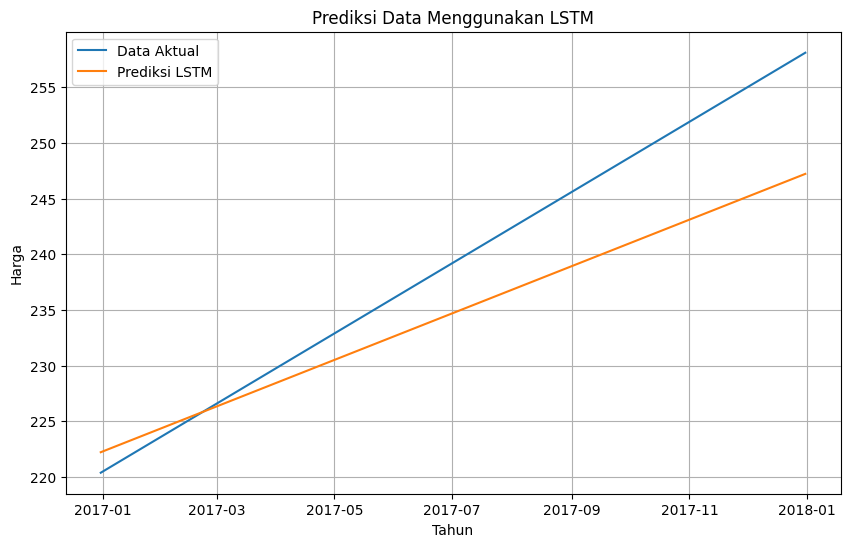

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-2-352c59adac50>:232: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang


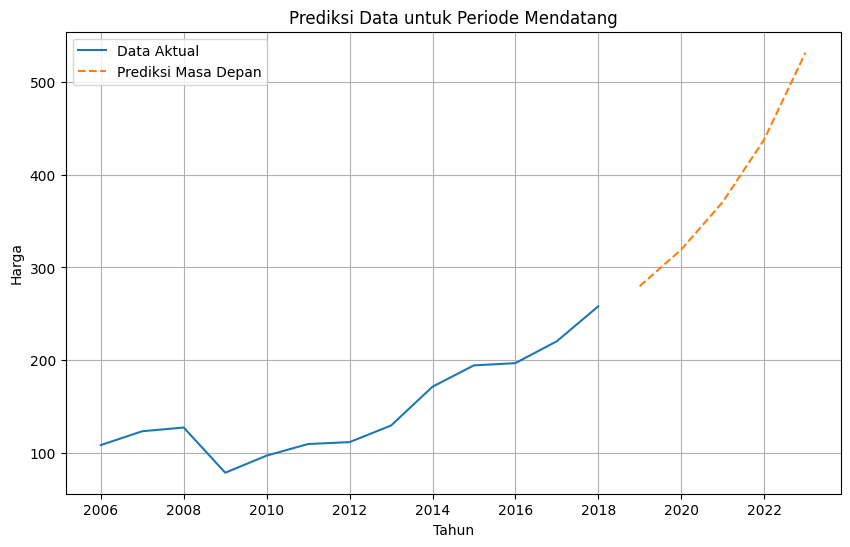

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

# Memuat data
data_file = 'spy.us.txt'
df = pd.read_csv(data_file, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Pilih kolom target
data = df[['Close']].values
print("Data Awal:")
print(df.head())
print(f"Bentuk Data: {df.shape}")
print(f"Kolom Data: {df.columns}")

# Grafik 1: Visualisasi Data
plt.figure(figsize=(12, 6))
df[['Close']].plot()
plt.title("Visualisasi Data")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.show()

# Grafik 2: Visualisasi Kumulatif
cumulative_values = df.cumsum()
plt.figure(figsize=(12, 6))
cumulative_values.plot()
plt.title("Visualisasi Kumulatif")
plt.show()

# Grafik 3: Plot Autokorelasi (Lag)
plt.figure(figsize=(10, 10))
lag_plot(df['Open'], lag=5)
plt.xlabel("Tanggal")
plt.title("Plot Autokorelasi (Lag 5)")
plt.show()

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membagi data pelatihan dan pengujian
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan time steps
def create_dataset(dataset, time_steps=60):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 100
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model LSTM
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1, verbose=1)

# Prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Membalikkan normalisasi untuk prediksi
train_predictions = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
test_predictions = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Membalikkan normalisasi untuk nilai aktual
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 4: Data Pelatihan, Pengujian, dan Prediksi
plt.figure(figsize=(14, 7))
plt.plot(df.index[:len(y_train_actual)], y_train_actual, label='Data Pelatihan (Aktual)', color='blue')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(y_test_actual)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(y_train_actual):len(y_train_actual)+len(test_predictions)], test_predictions, label='Prediksi Data Pengujian', color='green')
plt.title('Visualisasi Data: Pelatihan, Pengujian, dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi n periode ke depan
forecasted_values = []
last_sequence = data_scaled[-time_steps:]

for i in range(5):
    forecast_input = last_sequence.reshape((1, time_steps, X_train.shape[2]))
    forecast_value = model.predict(forecast_input)
    forecasted_values.append(forecast_value[0, 0])
    last_sequence = np.append(last_sequence[1:], forecast_value, axis=0)

# Membalikkan normalisasi untuk nilai prediksi
forecasted_values = scaler.inverse_transform(
    np.concatenate((np.array(forecasted_values).reshape(-1, 1), np.zeros((len(forecasted_values), data_scaled.shape[1] - 1))), axis=1)
)[:, 0]

# Grafik 5: Data Pengujian vs Prediksi
plt.figure(figsize=(14,7))
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], y_test_actual, label='Data Pengujian (Aktual)', color='red')
plt.plot(df.index[len(train_data):len(train_data)+len(test_predictions)], test_predictions, label='Prediksi Pengujian', color='green')
plt.title('Data Pengujian vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Menghitung kesalahan (MSE)
mse = mean_squared_error(y_test_actual, test_predictions)
print(f"Kesalahan Kuadrat Rata-rata (MSE): {mse:.3f}")


data = pd.read_csv(data_file, parse_dates=['Date'])

# Ubah kolom 'Tanggal' menjadi index
data.set_index('Date', inplace=True)

# Ambil hanya data nilai utama untuk analisis
data_yearly = data['Close'].resample('Y').last()

# Plot data tahunan
plt.figure(figsize=(10, 6))
data_yearly.plot()
plt.title('Visualisasi Data Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_yearly.values.reshape(-1, 1))

# Tentukan jumlah timesteps yang digunakan untuk prediksi
timesteps = 5

def create_dataset(data, timesteps=1):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

# Membuat dataset dengan timesteps
X, y = create_dataset(data_scaled, timesteps)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Mengembalikan nilai yang diprediksi ke skala asli
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot hasil prediksi vs data sebenarnya
plt.figure(figsize=(10, 6))

# Mendapatkan x-axis yang benar untuk data test
x_test_dates = data_yearly.index[train_size + timesteps:]  # Penyesuaian index untuk timesteps

plt.plot(x_test_dates, y_test_rescaled, label='Data Aktual')  # Gunakan x_test_dates untuk plotting
plt.plot(x_test_dates, y_pred_rescaled, label='Prediksi LSTM')  # Gunakan x_test_dates untuk plotting
plt.title('Prediksi Data Menggunakan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi untuk n periode ke depan
future_input = data_scaled[-timesteps:].reshape(1, timesteps, 1)
future_pred = []

for i in range(5):  # Prediksi untuk n periode (ubah 5 sesuai kebutuhan)
    pred = model.predict(future_input)
    future_pred.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_pred_rescaled = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))

# Menampilkan prediksi n periode ke depan
future_years = pd.date_range(start=data_yearly.index[-1] + pd.Timedelta(days=365), periods=5, freq='Y')  # Sesuaikan untuk prediksi jangka panjang
plt.figure(figsize=(10, 6))
plt.plot(data_yearly.index, data_yearly.values, label='Data Aktual')
plt.plot(future_years, future_pred_rescaled, label='Prediksi Masa Depan', linestyle='--')
plt.title('Prediksi Data untuk Periode Mendatang')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()
